# Project Summary

## Project Purpose

California real estate is becoming the nation's hot topic, since the recent surge in prices and inflation. In Santa Baraba County, houses can be in the range of \\$500,000 to $50,000,000, but what actually determines this housing price tag? Using machine learning we are going to find out what is going to quantify this information and find out what is the exact cost base on a few basic parameters, such as square footage, location, number of bedrooms, bathrooms, lot size, built year, etc. This project is a multi-linear regression machine learning model that can predict Santa Barbara housing data, including a user interface application in the Jupyter lab, data visualization, and insightful interpretation result.

## Datasets

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
files = 'Santa Barabara.xls'
df = pd.read_excel(files)
dfselect = df[['Bedrooms','BathRooms', 'SqFootage', 'YearBuilt', 'YearEff','LotSize','PropUse','SitusCity','SalePrice']]
cleandf = dfselect.dropna()
cleandf['SalePrice'] = cleandf['SalePrice'].replace("[$,]", "", regex=True).astype(int)
cleandf['SalePrice K'] = cleandf['SalePrice']/1000
cleandf = cleandf[cleandf['SalePrice K']<40000]
cleandf = cleandf.drop(columns=['SalePrice'])
cleandf = cleandf[cleandf['PropUse']!='Vacant Residential Land']
cleandf

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Bedrooms,BathRooms,SqFootage,YearBuilt,YearEff,LotSize,PropUse,SitusCity,SalePrice K
0,3.0,2.00,1232.0,1962.0,1995.0,6098.40,Single Family Residence,CARPINTERIA,1615.0
1,4.0,2.25,1944.0,1961.0,1962.0,11761.20,Single Family Residence,CARPINTERIA,1500.0
2,4.0,2.00,1408.0,1961.0,1975.0,7405.20,Single Family Residence,CARPINTERIA,1350.0
3,3.0,3.00,2338.0,1963.0,2005.0,10890.00,Single Family Residence,CARPINTERIA,1230.0
5,4.0,1.75,1300.0,1963.0,1964.0,8712.00,Single Family Residence,CARPINTERIA,1382.5
...,...,...,...,...,...,...,...,...,...
2279,3.0,4.00,5241.0,2001.0,2001.0,1093791.60,Single Family Residence,SANTA BARBARA,6785.0
2280,3.0,3.00,3904.0,1973.0,1990.0,63162.00,Single Family Residence,SANTA BARBARA,4975.0
2281,4.0,4.00,3299.0,1996.0,1996.0,41251.32,Single Family Residence,SANTA BARBARA,4100.0
2282,1.0,1.00,860.0,1965.0,1966.0,48787.20,Single Family Residence,SANTA BARBARA,2650.0


The data set was collected from Santa Baraba County, data set was downloaded as .xls file. The data has many null values and missing data. It was removed during the data cleaning process. There were also a few outliers above the 40 million dollars range, which was also removed since it can skew the majority of the population. The “SalesPrice” column was converted from string to integer. The 7 digit millions were too long to work with, it was reduced to K, Ex: 1M -> 1000K. After the cleaning, there were 1886 data left for this project.

## Data Product Code

In [2]:
import sklearn
import math
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

onehotdf = pd.get_dummies(cleandf, columns=['PropUse', 'SitusCity'], drop_first=True)
x_data = onehotdf.drop(columns=['SalePrice K'])
y_data = onehotdf['SalePrice K']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_data)
scaler.transform(x_data)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=30)
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

This code provide data cleaning, feature engineerging, split train/test data set and fit the multi-linear regression model which is the core algorithinm of this project. The data was scaled and standardized before inputting into the machine learning model, it provided the necessary functionality of predictive outputs and weight the data equally for analysis purpose. The train data set is use as inputs of this model, the test set is hidden from the training, which were used as a verification method after.

## Hypothesis verification

In [3]:
x_cols = x_data.columns
coef_df = pd.DataFrame({"Factors":x_cols,"Coefficients":abs(LR.coef_)})
coef_summary_df = coef_df[0:6]
proptype_mean = coef_df[6:8]['Coefficients'].mean()
location_mean = coef_df[8:]['Coefficients'].mean()
coef_summary_df = coef_summary_df.append({'Factors':'PropType','Coefficients':proptype_mean}, ignore_index=True)
coef_summary_df = coef_summary_df.append({'Factors':'Location','Coefficients':location_mean}, ignore_index=True)
coef_summary_df.sort_values(by = 'Coefficients', ascending = False).reset_index(drop=True).head()

,Factors,Coefficients
0,Location,576.315367
1,Bedrooms,385.553787
2,PropType,142.494964
3,BathRooms,98.500932
4,YearBuilt,5.413614


location seems to always contribute important factors to housing prices. A reasonable initial hypothesis was that "location is the most important factor that influences real estate prices". From the finding, it was conclude that the top 5 most influential factors are location, numbers of bedrooms, residentual house or condo, number of bathrooms, and year built. Factors are in sequential order most to least. It was verfied that the original hypothesis was accpect that location is the main role of influences. Beside the hypothesis, from the summary pie chart below, location factor was conclude that it contribute close to half of the housing price.

## Effective Visualizations and Reporting

<AxesSubplot:>

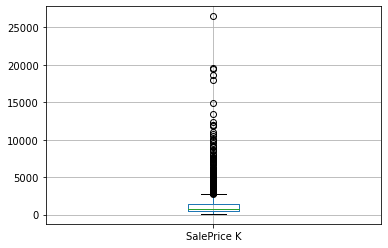

In [4]:
cleandf.boxplot(column=['SalePrice K'])

Using the box plot, there were a few outliers that was spoted. Prices that were above 40 millions were outliers which was removed during cleaning process. Visualizationfrom help to analysis the data more effecitvely. This would not be as clear if the data was read one by one, there are close to 2000 rows in this dataset.

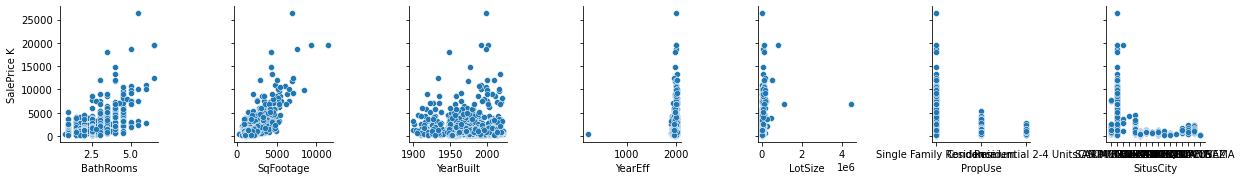

In [5]:
sns.pairplot(cleandf,x_vars=['BathRooms', 'SqFootage', 'YearBuilt', 'YearEff','LotSize','PropUse','SitusCity'], y_vars=['SalePrice K'],)

Using the pairplot, it visually indicate there was a trend in the data. All the parameters seems to affect the price some way, some is more, and some is less. Nonetheless, some kind of geometric pattern was observable. Which indicate the data was not random.

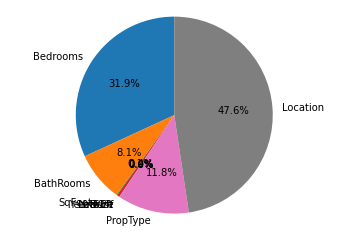

In [6]:
coef_df.sort_values(by = 'Coefficients', ascending = False).reset_index(drop=True)
coef_summary_df = coef_df[0:6]
proptype_mean = coef_df[6:8]['Coefficients'].mean()
location_mean = coef_df[8:]['Coefficients'].mean()
coef_summary_df = coef_summary_df.append({'Factors':'PropType','Coefficients':proptype_mean}, ignore_index=True)
coef_summary_df = coef_summary_df.append({'Factors':'Location','Coefficients':location_mean}, ignore_index=True)
labels = coef_summary_df['Factors']
values = coef_summary_df['Coefficients']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels,autopct='%1.1f%%', startangle=90 )
ax1.axis('equal')
plt.show()

This is final summary pie chart after the model is complete. It is immediately obvious to spot the quantity relationship between different factors and the contribution to the price. Surprisingly, there were only 4 factors that influence 99% of the price, the rest affect less than 1%.

## Accuracy analysis

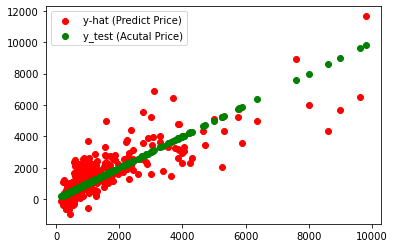

In [7]:
import matplotlib.pyplot as plt
y_prediction = LR.predict(x_test)
y_comparedf = pd.DataFrame({'y-hat':y_prediction.round(),'y_test':y_test})
plt.figure()
plt.scatter(x = y_comparedf['y_test'],y = y_comparedf['y-hat'],label='y-hat (Predict Price)', c='red')
plt.scatter(x = y_comparedf['y_test'],y = y_comparedf['y_test'],label='y_test (Acutal Price)', c='green')
plt.legend()

This chart plot against the prediction prices to the actual prices. It helps to understand how well the model does visually. The model is not perfect, there were residuals and deviation between prediction versus reailty. Nontheless, it does a good job capture the pattern, since the mean of the prediction seems to be align with the prices of the reailty. In this prespective, the model were successful.

In [8]:
LR.score(x_test, y_test)

0.6488986184301333

This number was the R-square score, it is 1 minus sum of residual square value. Generally speaking, any value above 50% indicate the model is effective. The closer to 1 to less error the model has. However, it is not too meaningful all by itself, this value will be most useful if compare to two or more different model with the same goal. The R-square score value can give an indication on which model perfrom the best.

## Application Testing
For testing to confirm the functionality of the code, a white box approach of unit testing was done. It ensure each segment of the code block work as intended. Lastly, a blackbox approach of usability was done for the interface application. Ensure the application is smooth and usable.

In [9]:
# Application Interface

print('---------- APPLICATION INTERFACE ---------- ')
print('How many Bedrooms?(int)')
bedroom = int(input())
print('How many Bathrooms?(int or float)')
bathroom = float(input())
print('What is the Sqfootage?(int)')
sqft = int(input())
print('What is the lot size footage?(int)')
lotsize = int(input())
print('Enter 1 for Single Family Residence, 2 for Residential 2-4 Units:')
prop = int(input())
print('Enter the number of which city, 1:CARPINTERIA, 2:GOLETA, 3:GUADALUPE, 4:LOMPOC, 5:ALAMOS, 6:LOS OLIVOS, 7:MONTECITO, 8:NEW CUYAMA, 9:ORCUTT, 10:SANTA BARBARA, 11:SANTA MARIA, 12:SANTA YNEZ, 13:SISQUOC, 14:SOLVANG, 15:SUMMERLAND')
city = int(input())
print('Enter Year Built:(int)')
yearbuilt = int(input())
print('Enter Effective Year:(int)')
yeareff = int(input())
print('---------- MODEL RESULTS ---------- ')

if city == 1:
    cityvalue = 'CARPINTERIA'
elif city == 2:
    cityvalue = 'GOLETA'
elif city == 3:
    cityvalue = 'GUADALUPE'
elif city == 4:
    cityvalue = 'LOMPOC'
elif city == 5:
    cityvalue = 'ALAMOS'
elif city == 6:
    cityvalue = 'LOS OLIVOS'
elif city == 7:
    cityvalue = 'MONTECITO'   
elif city == 8:
    cityvalue = 'NEW CUYAMA'   
elif city == 9:
    cityvalue = 'ORCUTT'   
elif city == 10:
    cityvalue = 'SANTA BARBARA'   
elif city == 11:
    cityvalue = 'SANTA MARIA'
elif city == 12:
    cityvalue = 'SANTA YNEZ'
elif city == 13:
    cityvalue = 'SISQUOC'
elif city == 14:
    cityvalue = 'SOLVANG'
elif city == 15:
    cityvalue = 'SUMMERLAND'

if prop == 1:
    propvalue = 'Single Family Residence'
elif prop == 2:
    propvalue = 'Residential 2-4 Units'
    
new_row = {'Bedrooms': bedroom, 'BathRooms': bathroom, 'SqFootage': sqft, 'YearBuilt': yearbuilt, 'YearEff': yeareff,'LotSize': lotsize,'PropUse': propvalue,'SitusCity': cityvalue,'SalePrice K': 0}
cleandf = cleandf.append(new_row, ignore_index=True)
onehotdf = pd.get_dummies(cleandf, columns=['PropUse', 'SitusCity'], drop_first=True)
newx_data = onehotdf.drop(columns=['SalePrice K']).iloc[-1]
userxdata = scaler.transform([newx_data.to_numpy()])
yhatprice = LR.predict(userxdata)[0].round()
print('The Model Prediction Price is '+ "${:,.2f}".format(yhatprice*100))

---------- APPLICATION INTERFACE ---------- 
How many Bedrooms?(int)


 2


How many Bathrooms?(int or float)


 2


What is the Sqfootage?(int)


 2000


What is the lot size footage?(int)


 0


Enter 1 for Single Family Residence, 2 for Residential 2-4 Units:


 1


Enter the number of which city, 1:CARPINTERIA, 2:GOLETA, 3:GUADALUPE, 4:LOMPOC, 5:ALAMOS, 6:LOS OLIVOS, 7:MONTECITO, 8:NEW CUYAMA, 9:ORCUTT, 10:SANTA BARBARA, 11:SANTA MARIA, 12:SANTA YNEZ, 13:SISQUOC, 14:SOLVANG, 15:SUMMERLAND


 11


Enter Year Built:(int)


 1980


Enter Effective Year:(int)


 2030


---------- MODEL RESULTS ---------- 
The Model Prediction Price is $893,800.00


## Application Files
Software Requirements:
- Any OS
- Python 3.9
- Jupyter Lab
- Python Libraries: pandas, sklearn, math, numpy, matplotlib, seaborn, xlrd
- Main Application Files: Real_Estate_ML/main_lab.ipynb running using Jupyter Lab, data is Real_Estate_ML/Santa Barabara.xls.
- Extra Content: Real_Estate_ML/Project_Summary.ipynb content same information in this current document.

## User’s Guide
Brief manual for the installation and use of the application and all steps necessary to establish an environment capable of running the application and producing the required results.

1. Install Python 3.9 https://www.python.org/downloads/ in your OS.
3. In CDM enter:
    pip install jupyterlab
4. Unzip and extract the "Real_estate_ML" file to a perfer location.
5. Open Jupyter Lab browser in CMD enter:
    jupyter lab
6. Open "main_lab.ipynb" in the Jupyter Lab browser.
7. Run the first cell to install all the Python libraries: pandas, sklearn, math, numpy, matplotlib, seaborn, xlrd
8. Run all cells.
9. Enter your housing information at the last cell.

If there is any trouble installing the jupyter lab, please check out https://jupyter.org/install. You may extract the "main_lab.ipynb" and "Santa Barabara.xls" to a new files, just make sure run the first cell and pip install all the libraries. Anaconda version of Jupyter Lab may provide a simpler install experience.

## References and Sources
There are no citations or quotes used.
